# BONUS FOR ME352
## NAME :- VASU BANSAL(160776), VISHAL SINGH(160804) <br>

_This code is written in Python 3 and has been tested on Jupyter notebook, a browser based IDE._
<br><br>
### Purpose and Resources
This code simulates the motion of a triple pendulum. The equations of motion are obtained using Lagrange's method.
<br><br>
The Animation part was adapted from websites like https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/, https://matplotlib.org/2.1.2/gallery/animation/basic_example.html, https://www.youtube.com/watch?v=ZmYPzESC5YY
<br><br>
The Time integration part was done by referring the official documentation https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html. This tutorial https://www.youtube.com/watch?v=VV3BnroVjZo was also a good reference.
<br><br>





In [1]:
## These libraries are used in this code.
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [2]:
G = (float)(input("Enter the value of gravitational acceleration : "))  # acceleration due to gravity, in m/s^2

L1 = (float)(input("Enter the length of first pendulum : "))  # length of pendulum 1 in m
L2 = (float)(input("Enter the length of second pendulum : "))  # length of pendulum 2 in m
L3 = (float)(input("Enter the length of third pendulum : "))  # length of pendulum 3 in m

M1 = (float)(input("Enter the mass of first pendulum bob : "))  # mass of pendulum 1 in kg
M2 = (float)(input("Enter the mass of second pendulum bob : "))  # mass of pendulum 2 in kg
M3 = (float)(input("Enter the mass of third pendulum bob : "))  # mass of pendulum 3 in kg

time = (int)(input("Enter the duration of the simulation you want : ")) # the duration of the simulation video

Enter the value of gravitational acceleration : 9.8
Enter the length of first pendulum : 1
Enter the length of second pendulum : 1
Enter the length of third pendulum : 1
Enter the mass of first pendulum bob : 1
Enter the mass of second pendulum bob : 1
Enter the mass of third pendulum bob : 1
Enter the duration of the simulation you want : 20


In [3]:
def derivatives(state, t):

    dydt = np.zeros_like(state)            
    
    delta1 = state[0] - state[2] # stores theta1-theta2
    delta2 = state[2] - state[4] # stores theta2-theta3
    delta3 = state[4] - state[0] # stores theta3-theta1
    
    
    a1=(M1+M2+M3)*L1*L1
    a2=L1*L2*cos(delta1)*(M2+M3)
    a3=L3*L1*cos(delta3)*M3
    
    b1=L1*L2*cos(delta1)*(M2+M3)
    b2=L2*L2*(M2+M3)
    b3=L2*L3*cos(delta2)*M3
    
    c1=L3*L1*cos(delta3)*M3
    c2=L2*L3*cos(delta2)*M3
    c3=L3*L3*M3
    
    a4=(M1+M2+M3)*G*L1*sin(state[0])
    a5= -L1*L2*state[3]*(state[1]-state[3])*sin(delta1)*(M2+M3)
    a6= L3*L1*state[5]*(state[5]-state[1])*sin(delta3)*M3
    
    a= a5 - a6 +L1*L2*state[1]*state[3]*sin(delta1)*(M2+M3)-L3*L1*state[5]*state[1]*sin(delta3)*M3 + a4
    
    b4= -L1*L2*state[1]*(state[1]-state[3])*sin(delta1)*(M2+M3)
    b5= L2*L3*state[5]*(state[3]-state[5])*sin(delta2)*M3
    b6= (M2+M3)*G*L2*sin(state[2])
    
    b=b4-b5 -L1*L2*state[1]*state[3]*sin(delta1)*(M2+M3)+L2*L3*state[3]*state[5]*sin(delta2)*M3+ b6
    
    c4= -L2*L3*state[3]*(state[3]-state[5])*sin(delta2)*M3
    c5= L3*L1*state[1]*(state[5]-state[1])*sin(delta3)*M3
    c6 = M3*G*L3*sin(state[4])
    
    c=c4-c5 -L2*L3*state[3]*state[5]*sin(delta2)*M3+L3*L1*state[5]*state[1]*sin(delta3)*M3+ c6

    
    dydt[0] = state[1]
    dydt[2] = state[3]
    dydt[4] = state[5]
    dydt[1]=-((b2*c3-b3*c2)*(b2*a-b1*b)-(b2*c1-b1*c2)*(b2*c-b3*b))/((b2*c3-b3*c2)*(b2*a1-b1*a2)-(b2*c1-b1*c2)*(b2*a3-b3*a2))
    dydt[3]=-((c3*a2-c2*a3)*(a*a2-b*a1)-(c1*a2-c2*a1)*(c*a2-b*a3))/((c3*a2-c2*a3)*(b1*a2-b2*a1)-(c1*a2-c2*a1)*(b3*a2-b2*a3))
    dydt[5]=-((b3*a2-b2*a3)*(a*a2-b*a1)-(b1*a2-b2*a1)*(c*a2-b*a3))/((b3*a2-b2*a3)*(c1*a2-c2*a1)-(b1*a2-b2*a1)*(c3*a2-c2*a3))
    
    return dydt

# dydt is an array of six elements. The odd positions store angular velocity or the first derivative of state,
# and the even positions store the angular acceleration or the second derivative of state.

It can be seen that the equations have been broken into pieces by storing complex terms in a variable. This is because there is some limitation in the storage of Python's data handling, due to which the large equations resulted in a zero value every time.

In [4]:
# Create a time array from 0.....'required time' sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, time, dt)

In [5]:
# theta1, theta2, theta3 are the initial angles (degrees)
# omega1, omega2, omega3 are the initial angular velocities (degrees per second)

theta1 = (float)(input("Enter the initial angle for the first pendulum : "))
omega1 = (float)(input("Enter the initial angular velocity for the first pendulum : "))
theta2 = (float)(input("Enter the initial angle for the second pendulum : "))
omega2 = (float)(input("Enter the initial angular velocity for the second pendulum : "))
theta3 = (float)(input("Enter the initial angle for the third pendulum : "))
omega3 = (float)(input("Enter the initial angular velocity for the third pendulum : "))

Enter the initial angle for the first pendulum : 180
Enter the initial angular velocity for the first pendulum : 0
Enter the initial angle for the second pendulum : 180
Enter the initial angular velocity for the second pendulum : 0
Enter the initial angle for the third pendulum : 180
Enter the initial angular velocity for the third pendulum : 0


In [6]:
# Defined initial state
state = np.radians([theta1, omega1, theta2, omega2 ,theta3, omega3]) # This converts the values from degrees into radians

For better understanding of the odeint, please watch this video https://www.youtube.com/watch?v=VV3BnroVjZo
<br>
The first parameter gives derivatives. Second one has the initial conditions and last is an array, which has steps for the variable over which the derivative has to be integrated

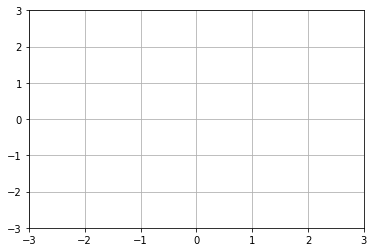

In [7]:
# Integrate ODE using scipy.integrate.
y = integrate.odeint(derivatives, state, t)


# The array 'y' has the coordinates for every time step over the duration we wanted.

x1 = L1*sin(y[:, 0]) # Stores x coordinate of first pendulum's bob for every time step
y1 = -L1*cos(y[:, 0]) # Stores y coordinate of first pendulum's bob for every time step

x2 = L2*sin(y[:, 2]) + x1 
y2 = -L2*cos(y[:, 2]) + y1 

x3 = L3*sin(y[:, 4]) + x2
y3 = -L3*cos(y[:, 4]) + y2


# Defining the 2D plane on which simulation will be performed
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True, xlim=(-(L1+L2+L3), (L1+L2+L3)), ylim=(-(L1+L2+L3), (L1+L2+L3)))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


In [8]:
def init(): # Initializing Animation
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

In [11]:
def animate(i): # Creating an animation step
    thisx = [0, x1[i], x2[i], x3[i]]
    thisy = [0, y1[i], y2[i], y3[i]]
    
    
    
    plt.plot(x1[i],y1[i],marker='o',markersize='1',color='black') # To get the scatter plot of the first pendulum's bob
    plt.plot(x2[i],y2[i],marker='o',markersize='1',color='green') # To get the scatter plot of the second pendulum's bob
    plt.plot(x3[i],y3[i],marker='o',markersize='1',color='red') # To get the scatter plot of the third pendulum's bob

    line.set_data(thisx, thisy) # Draws lines of required coordinates in the current frame
    time_text.set_text(time_template % (i*dt)) # Displays time for the current frame
    
    return line, time_text

For creating the animation, 'FuncAnimation' is used. These videos explains it nicely https://www.youtube.com/watch?v=c7GoaIsPlLE https://www.youtube.com/watch?v=ZmYPzESC5YY

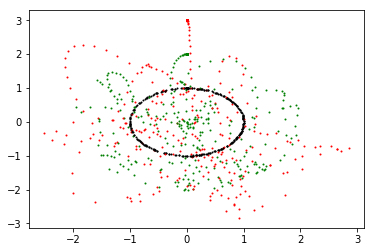

In [12]:
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval= time , blit=True, init_func=init) # Animation object is created


ani.save('superimpose_3.mp4', fps=15) # Animation is saved as an mp4 file. fps stands for frames per second. It can
                                        # changed according to one's requirements.


plt.show()
